## 1. Scipy - обрезка изображения

In [1]:
import scipy
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


### Создали цветную карту котика

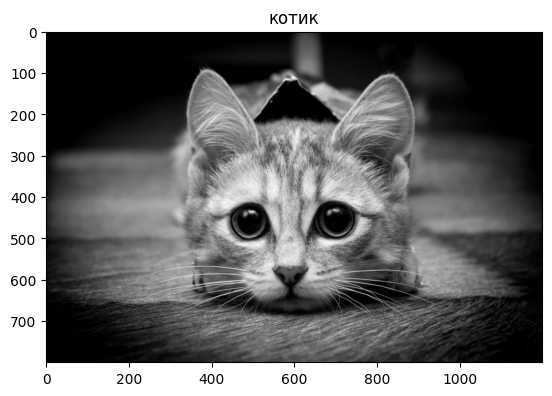

In [2]:
img_url="https://gas-kvas.com/grafic/uploads/posts/2023-09/1695867970_gas-kvas-com-p-kartinki-cherno-belie-kotikov-16.jpg"
r = requests.get(img_url, allow_redirects=True)
imgname="img1.jpg"
open(imgname, 'wb').write(r.content)
img = mpimg.imread(imgname)
plt.imshow(img)
plt.title('котик')
plt.show()

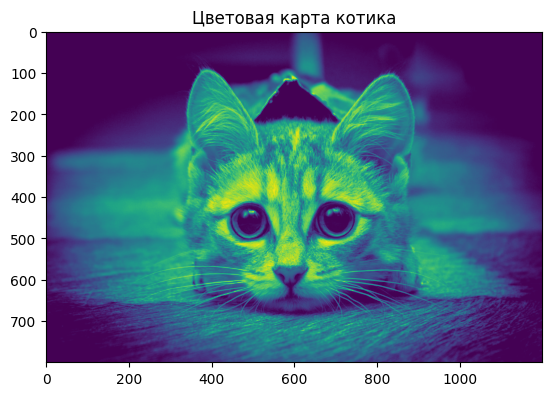

In [3]:
plt.imshow(img[:, :, 0])
plt.title('Цветовая карта котика')
plt.show()

### Создали обрезаную картинку

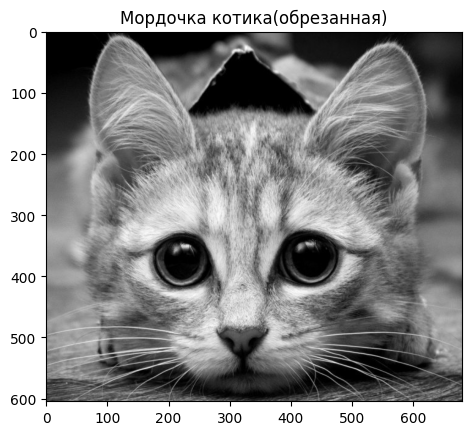

In [4]:
crop=img[85:-110, 270:-250]
plt.imshow(crop)
plt.title('Мордочка котика(обрезанная)')
plt.show()

### Создали подглядывающего котика

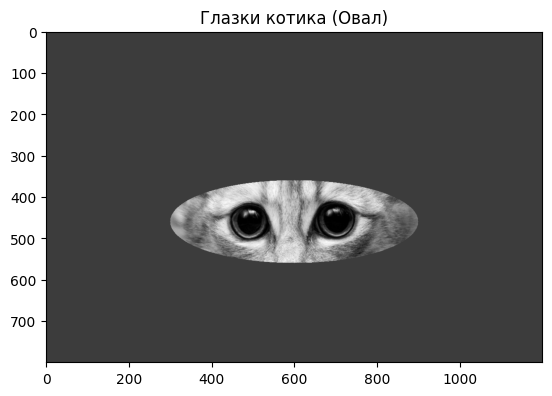

In [5]:
import numpy as np
from PIL import Image
img = np.array(Image.open(imgname))
sy, sx, sz = img.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape
a=300; b=100

centerx, centery = (sx/2, sy/2) # центр изображения
mask = ((((y - centery-60)**2)/b**2) + (((x - centerx)**2)/a**2)) > 1 # круг
img[mask] = 60
plt.title('Глазки котика (Овал)')
plt.imshow(img) 
plt.show()

## 2. Работа со статистикой

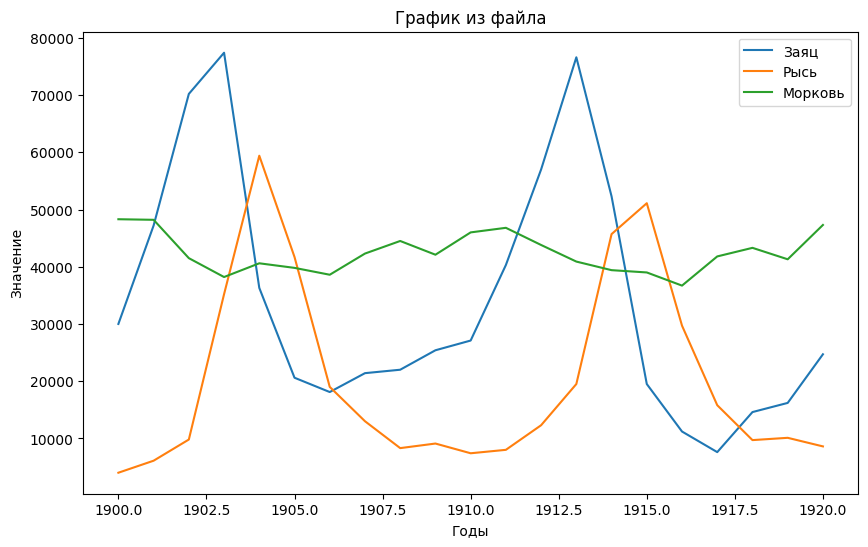

In [6]:
import numpy as np

data_table = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')

years = data_table[:, 0]
hare = data_table[:, 1]
lynx = data_table[:, 2]
carrot = data_table[:, 3]


plt.figure(figsize=(10, 6))
plt.plot(years, hare, label='Заяц')
plt.plot(years, lynx, label='Рысь')
plt.plot(years, carrot, label='Морковь')

plt.title('График из файла')
plt.xlabel('Годы')
plt.ylabel('Значениe')
plt.legend()
plt.show()

#### Среднее отклонение

In [7]:
print(f"Среднее отклонение для зайцев:\t {np.mean(hare)}")
print(f"Среднее отклонение для рысей:\t {np.mean(lynx)}")
print(f"Среднее отклонение для морковки: {np.mean(carrot)}")

Среднее отклонение для зайцев:	 34080.95238095238
Среднее отклонение для рысей:	 20166.666666666668
Среднее отклонение для морковки: 42400.0


#### Стандартное отклонение

In [8]:
print(f"Стандартное отклонение для зайцев:\t {np.std(hare)}")
print(f"Стандартное отклонение для рысей:\t {np.std(lynx)}")
print(f"Стандартное отклонение для морковки:\t {np.std(carrot)}")

Стандартное отклонение для зайцев:	 20897.906458089667
Стандартное отклонение для рысей:	 16254.591536908763
Стандартное отклонение для морковки:	 3322.5062255844787


#### Максимальные значения

In [9]:
print(f"Популяция вида была наибольшей для зайцев:\t {int(years[np.argmax(hare)])}")
print(f"Популяция вида была наибольшей для рысей:\t {int(years[np.argmax(lynx)])}")
print(f"Популяция вида была наибольшей для морковки:\t {int(years[np.argmax(carrot)])}")

Популяция вида была наибольшей для зайцев:	 1903
Популяция вида была наибольшей для рысей:	 1904
Популяция вида была наибольшей для морковки:	 1900


#### Какой вид имеет наибольшую популяцию за каждый год?

In [10]:
max_species_each_year = np.array(['H', 'L', 'C'])[np.argmax(data_table[:, 1:], axis=1)]
print(f"Вид с наибольшей популяцией за каждый год: {max_species_each_year}")

Вид с наибольшей популяцией за каждый год: ['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']


#### В какие годы любая из популяций превышает 50000?

In [11]:
years_above_50000 = years[np.any(data_table[:, 1:] > 50000, axis=1)]
print(f"Годы, когда популяции превышают 50000: {years_above_50000}")

Годы, когда популяции превышают 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


#### Топ 2 года для каждого вида, когда его популяции были самыми низкими

In [12]:
print(f"Анти-Топ 2 годов для зайцев:\t {years[np.argsort(hare)[:2]]}")
print(f"Анти-Топ 2 годов для рысей:\t {years[np.argsort(lynx)[:2]]}")
print(f"Анти-Топ 2 годов для морковки:\t {years[np.argsort(carrot)[:2]]}")

Анти-Топ 2 годов для зайцев:	 [1917. 1916.]
Анти-Топ 2 годов для рысей:	 [1900. 1901.]
Анти-Топ 2 годов для морковки:	 [1916. 1903.]


### Сравните (постройте график) изменения численности

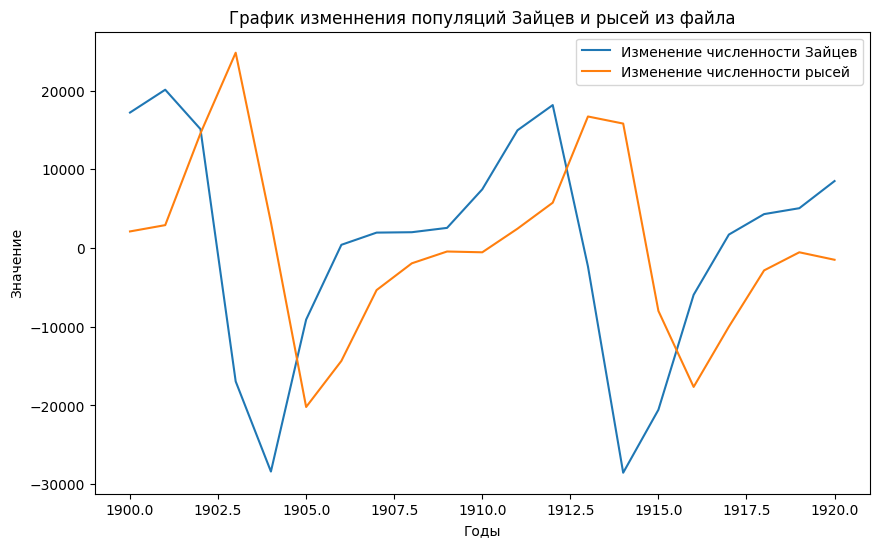

In [13]:
import numpy as np

data_table = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')

years = data_table[:, 0]
hare = data_table[:, 1]
lynx = data_table[:, 2]

hares_grad= np.gradient(hare, years)
lynxes_grad = np.gradient(lynx, years)


plt.figure(figsize=(10, 6))
plt.plot(years, hares_grad, label='Изменение численности Зайцев')
plt.plot(years, lynxes_grad, label='Изменение численности рысей')


plt.title('График изменнения популяций Зайцев и рысей из файла')
plt.xlabel('Годы')
plt.ylabel('Значениe')
plt.legend()
plt.show()

#### Корреляция между изменениями численности зайцев и рысей


In [14]:
print(f"Корреляция между изменениями численности зайцев и рысей: {np.corrcoef(hares_grad, lynxes_grad)[0, 1]}")


Корреляция между изменениями численности зайцев и рысей: -0.05136252586288724


## множество Мандельброта

In [15]:
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    if n == max_iter:
        return max_iter
    return n  + np.log(np.log2(abs(z)))

In [16]:
width, height = 1000, 1000
x_min, x_max = -1.8, 0.8
y_min, y_max = -1.3, 1.45
max_iter = 1000

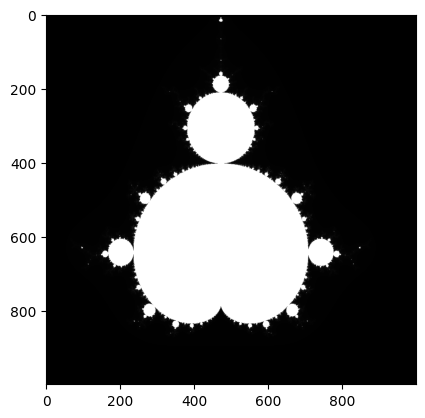

In [17]:
image = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        real = x_min + x * (x_max - x_min) / (width - 1)
        imaginary = y_min + y * (y_max - y_min) / (height - 1)
        c = complex(real, imaginary)
        color = mandelbrot(c, max_iter)
        image[x, y] = color
plt.imshow(image)
plt.savefig('mandelbrot.png')
plt.gray()
plt.show()